In [4]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
import psycopg2
%matplotlib inline

# Improve readability of figures
%config InlineBackend.figure_format = 'retina'
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1.3
)

In [2]:
# Set credentials
db_name1 = 'section1'
db_name2 = 'section2'
usernm = 'redwan'
host = 'localhost'
pwd = 'pentium'
port = '5432'

In [5]:
# Connect to a database
con1 = psycopg2.connect(
    database=db_name1, 
    host='localhost',
    user=usernm,
    password=pwd
)

# Define a SQL query
sql_query = """
SELECT * 
  FROM section1;
"""

# Perform SQL query and store results in a DataFrame
section1_df_full = pd.read_sql_query(sql_query, con1)

# Display the first five rows
section1_df_full.head()

,level_0,index,num_sents,num_words,num_all_caps,percent_all_caps,num_exclms,percent_exclms,num_apple_words,percent_apple_words,...,num_bolded,percent_bolded,name,category,hyperlink,currency,pledged,goal,location,funded
0,0,88389,15.0,223.0,0.0,0.000000,3.0,0.002317,0.0,0.000000,...,0.0,0.000000,Help me start my cottage industry ... Bakesale...,Small Batch,https://www.kickstarter.com/projects/138529431...,USD,0.0,10000.0,"Cape Coral, FL",False
1,1,190378,15.0,383.0,0.0,0.000000,4.0,0.003089,0.0,0.000000,...,0.0,0.000000,The Sock Who Lost His Mate at NY Children's Th...,Musical,https://www.kickstarter.com/projects/987315242...,USD,2600.0,7000.0,"Greenwich Village, Manhattan, NY",False
2,2,21028,15.0,259.0,17.0,0.013127,0.0,0.000000,1.0,0.000772,...,0.0,0.000000,The 4 Disciples,Comic Books,https://www.kickstarter.com/projects/the4disci...,USD,165.0,2200.0,"Rahway, NJ",False
3,3,154207,18.0,431.0,0.0,0.000000,3.0,0.002317,1.0,0.000772,...,0.0,0.000000,Every Precious Boy and Girl - Stories of Women...,Children's Books,https://www.kickstarter.com/projects/646886749...,USD,1836.0,1590.0,"Ann Arbor, MI",True
4,4,46223,23.0,283.0,2.0,0.001544,15.0,0.011583,0.0,0.000000,...,12.0,0.009266,Message in a Bottle Necklaces,Jewelry,https://www.kickstarter.com/projects/764561485...,USD,11.0,100.0,"Pasadena, CA",False


In [7]:
section1_df_full['funded'] = section1_df_full['funded'].apply(str)

In [35]:
by_funded = section1_df_full.groupby('funded')
by_category = section1_df_full.groupby('category')

In [16]:
section1_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 29 columns):
level_0                    5615 non-null int64
index                      5615 non-null int64
num_sents                  5614 non-null float64
num_words                  5605 non-null float64
num_all_caps               5614 non-null float64
percent_all_caps           5605 non-null float64
num_exclms                 5614 non-null float64
percent_exclms             5605 non-null float64
num_apple_words            5614 non-null float64
percent_apple_words        5605 non-null float64
avg_words_per_sent         5594 non-null float64
num_paragraphs             5614 non-null float64
avg_sents_per_paragraph    5527 non-null float64
avg_words_per_paragraph    5527 non-null float64
num_images                 5614 non-null float64
num_videos                 5614 non-null float64
num_youtubes               5614 non-null float64
num_gifs                   5614 non-null float64
num_hyperlinks 

In [69]:
features = ['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
             'num_exclms', 'percent_exclms', 'num_apple_words',
             'percent_apple_words', 'avg_words_per_sent', 'num_paragraphs',
             'avg_sents_per_paragraph', 'avg_words_per_paragraph',
             'num_images', 'num_videos', 'num_youtubes', 'num_gifs',
             'num_hyperlinks', 'num_bolded', 'percent_bolded']

In [98]:
A = section1_df_full[section1_df_full['funded'] == 'True'][features].corr()
B = section1_df_full[section1_df_full['funded'] == 'False'][features].corr()
for i in range(len(features)):
    A.iloc[i,i] = 0
    B.iloc[i,i] = 0

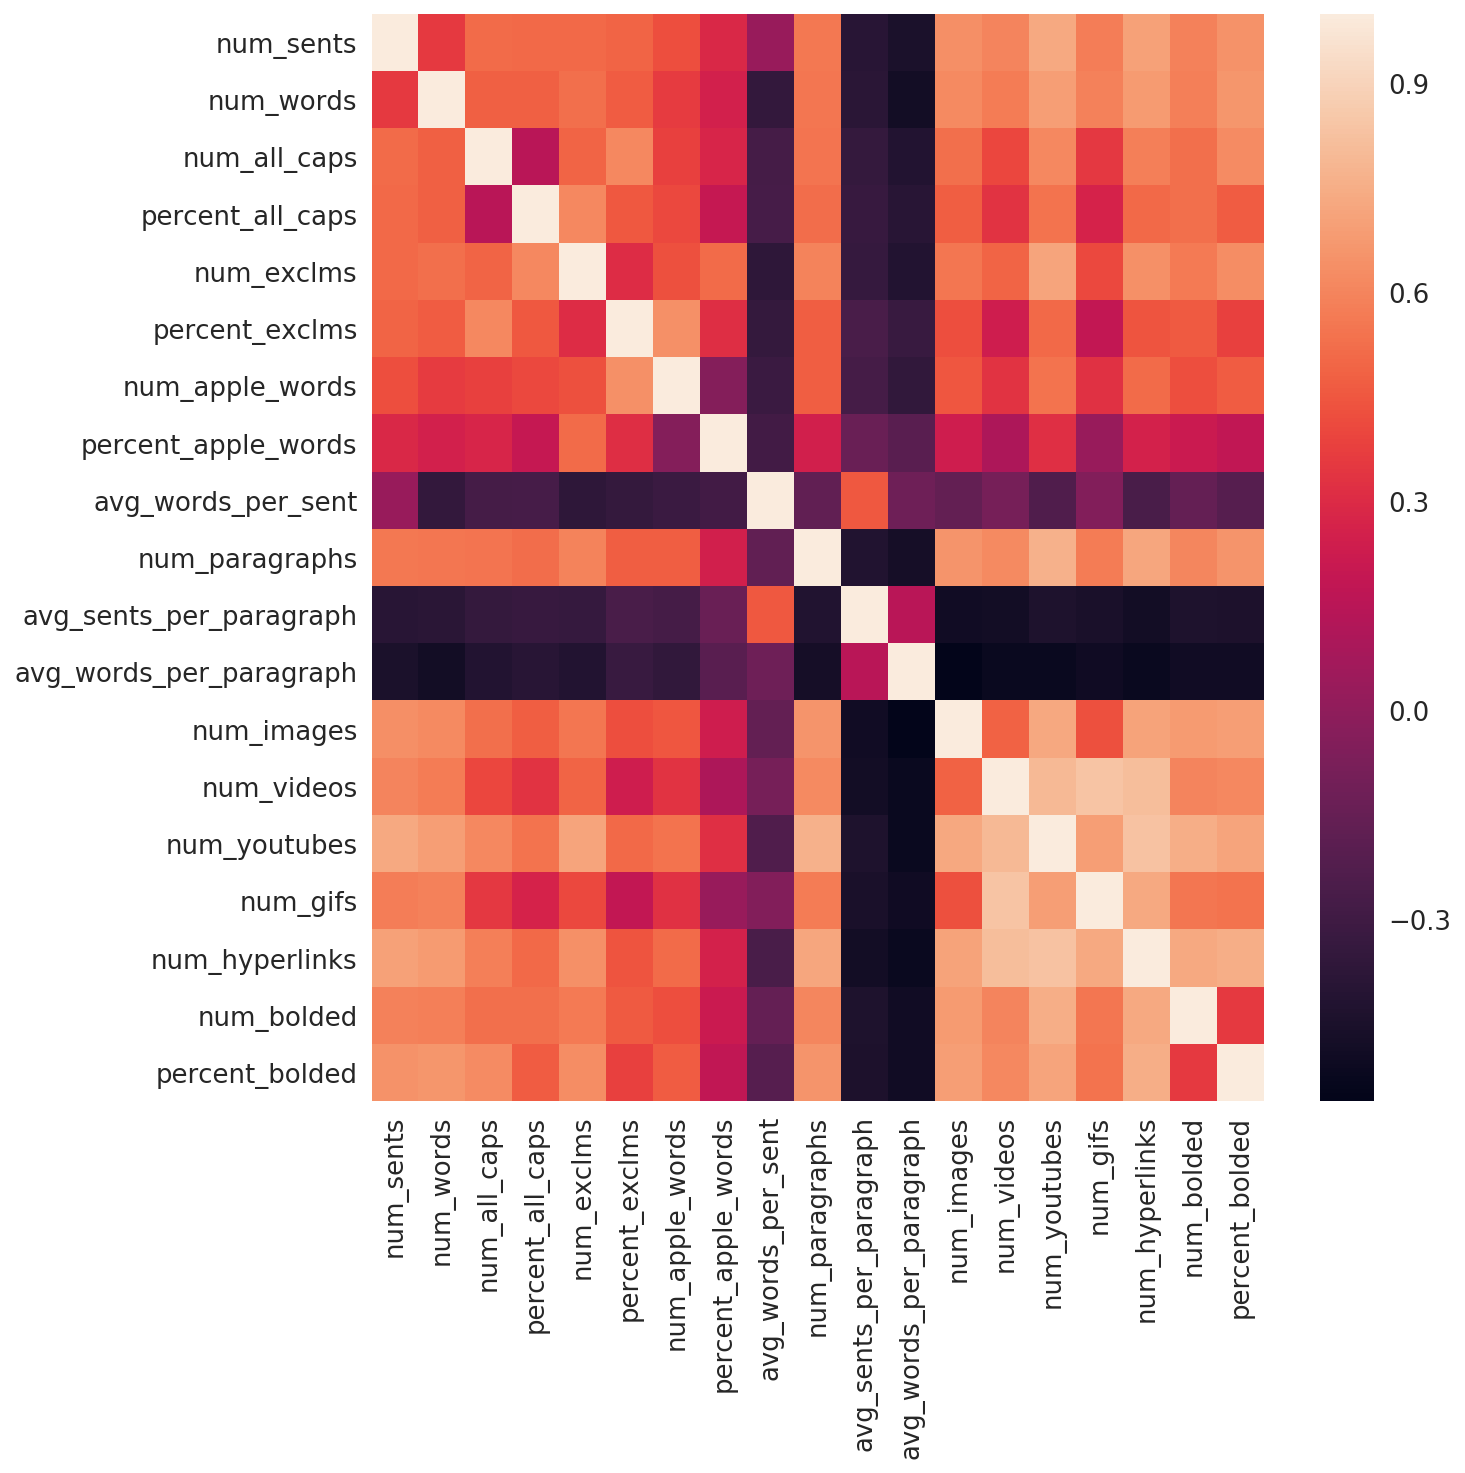

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(A.corr(), ax=ax);

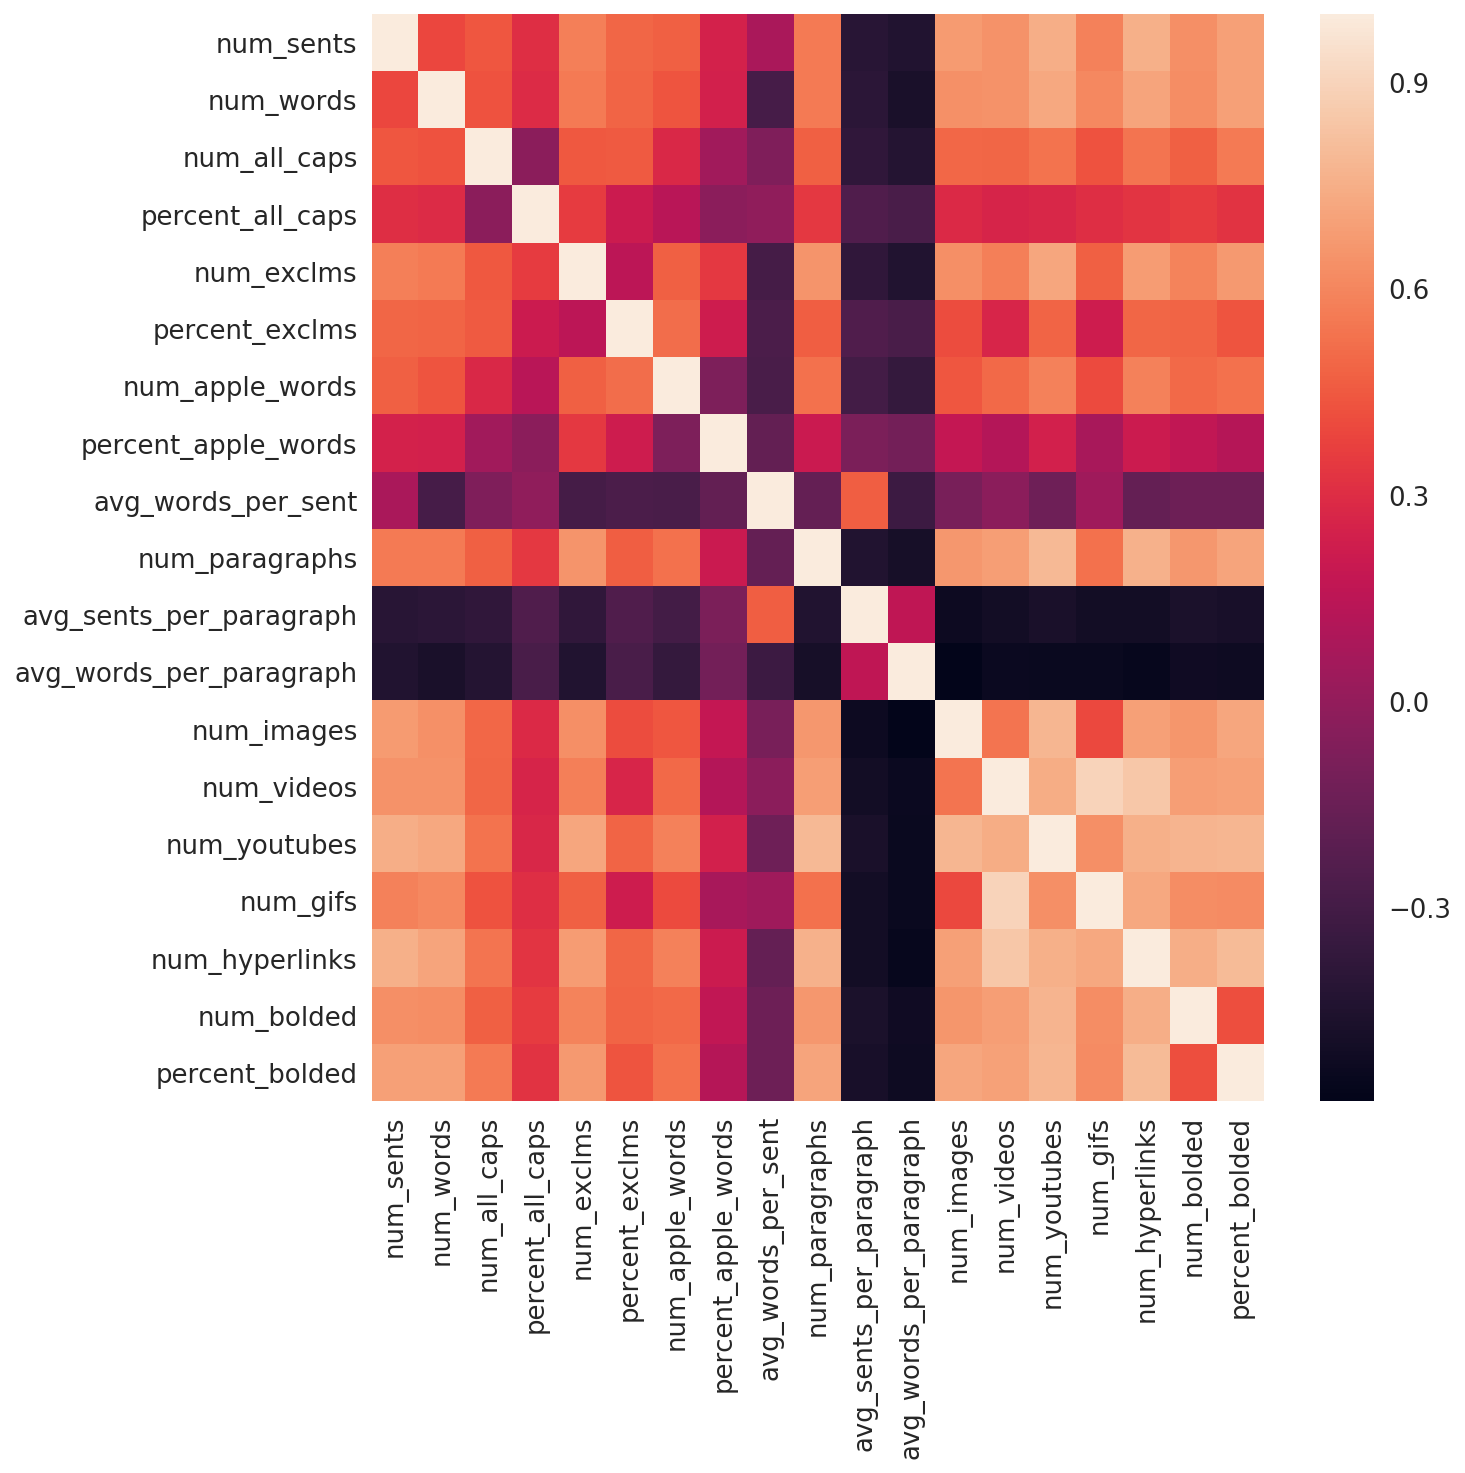

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(B.corr(), ax=ax);